**Data Analysis (Final Challenge)**


```
© Daniel Broś, Hubert Pamuła
Applied Computer Science, FAIS UJ
```





---


## 1. **Ładowanie danych**

In [70]:
# Importing some of the libraries needed
import pandas as pd               # dataframes
import numpy as np                # math operations
import matplotlib.pyplot as plt   # plotting charts

In [71]:
# a) Loading the initial dataset using the URL adres to its source
from pathlib import Path          # for handling paths on different devices
from zipfile import ZipFile       # for extracting data from zip archives
import urllib.request             # accessing data using URL addresses

# Creating an auxilary function for downloading the dataset
def load_data():
    """ This auxilary function downloads and save the initial dataset.
    It returns a pandas dataframe """

    zip_archive_path = Path("datasets/power_consumption.csv.zip")

    if not zip_archive_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "http://archive.ics.uci.edu/static/public/849/power+consumption+of+tetouan+city.zip"
        urllib.request.urlretrieve(url, zip_archive_path)
        with ZipFile(zip_archive_path, 'r') as f:
            f.extractall(path="datasets")

    return pd.read_csv(Path("datasets/Tetuan City power consumption.csv"),
                       parse_dates=['DateTime'])  # Parsing the date

# Loading the data
data = load_data()

# Showing the first 5 records of the pandas dataframe prepared
data.head(5)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


Widać, że dane były aktualizowane co 10 minut, więc możemy zobaczyć jak się zachowywały w ciągu doby, dnia, tygodnia, miesiąca.



---


## 2. **Wstępne przetwarzanie**

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DateTime                   52416 non-null  datetime64[ns]
 1   Temperature                52416 non-null  float64       
 2   Humidity                   52416 non-null  float64       
 3   Wind Speed                 52416 non-null  float64       
 4   general diffuse flows      52416 non-null  float64       
 5   diffuse flows              52416 non-null  float64       
 6   Zone 1 Power Consumption   52416 non-null  float64       
 7   Zone 2  Power Consumption  52416 non-null  float64       
 8   Zone 3  Power Consumption  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB


In [73]:
data.describe()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,2017-07-01 23:55:00,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
min,2017-01-01 00:00:00,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,2017-04-01 23:57:30,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,2017-07-01 23:55:00,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,2017-09-30 23:52:30,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,2017-12-30 23:50:00,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360
std,NaN,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099


*   **Dobra wiadomość:** autorzy zapewniają, że nie ma brakujących wartości, więc zbiór nie jest "wdzięcznym" przykładym dydaktycznym, tylko porządnie przygotowanym zestawem danych.
*   **Zła wiadomość:** nikt nie mówił o tym, czy są duplikaty czy nie.

In [74]:
# Wprowadzenie krótszych nazw
data.columns = ["date", "temperature", "humidity", "wind", "general_flow", "flow", "zone_1", "zone_2", "zone_3"]
# Sortowanie zgodnie z datą oraz ustawienie daty jako indeks
data = data.sort_values("date").set_index("date")
# Pozbywamy się duplikatów, jeżeli są
data = data.drop_duplicates()

In [75]:
# Teraz zobaczmy okres (od rok-miesiąc-dzień)
data.head(1)

,temperature,humidity,wind,general_flow,flow,zone_1,zone_2,zone_3
date,,,,,,,,
2017-01-01,6.559,73.8,0.083,0.051,0.119,34055.6962,16128.87538,20240.96386


In [76]:
# Do rok-miesiąc-dzień
data.tail(1)

,temperature,humidity,wind,general_flow,flow,zone_1,zone_2,zone_3
date,,,,,,,,
2017-12-30 23:50:00,6.58,74.1,0.081,0.062,0.111,28349.80989,24055.23167,13345.4982


Ok, mamy dane za cały 2017 rok, czyli zmian w ciągu kilku lat nie zobaczymy.

Nie będziemy utrudniać życia naszym modelom, tak że rozdzielmy zbiór danych na 3 zbiory w zależności od tego jaka jest strefa w tym naszym badanym mieście:

In [77]:
X = data.drop(['zone_1', 'zone_2', 'zone_3'], axis='columns')
y1 = data['zone_1']
y2 = data['zone_2']
y3 = data['zone_3']

In [78]:
X.head(1)

,temperature,humidity,wind,general_flow,flow
date,,,,,
2017-01-01,6.559,73.8,0.083,0.051,0.119


In [79]:
y1.head(1)

date
2017-01-01    34055.6962
Name: zone_1, dtype: float64

In [80]:
y2.head(1)

date
2017-01-01    16128.87538
Name: zone_2, dtype: float64

In [81]:
y3.head(1)

date
2017-01-01    20240.96386
Name: zone_3, dtype: float64



---


## 3. **Analiza szeregu czasowego**

Spróbujmy wykryć sezonowość na przykładzie zmian zużycia energii w 1. strefie/obszarze:

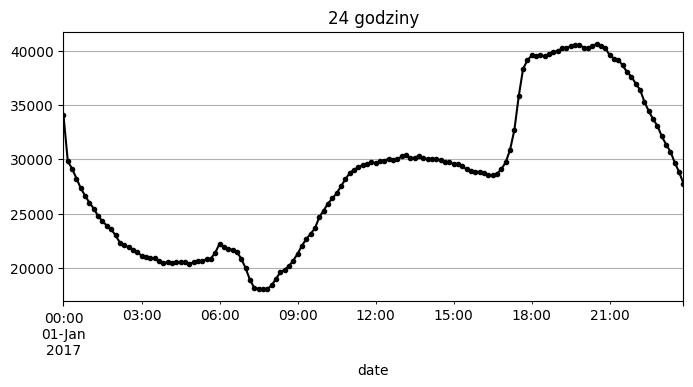

In [82]:
import matplotlib.pyplot as plt

y1["2017-01-01":"2017-01-01"].plot(grid=True, marker=".", figsize=(8, 3.5), color='black')
plt.title("24 godziny")
plt.show()

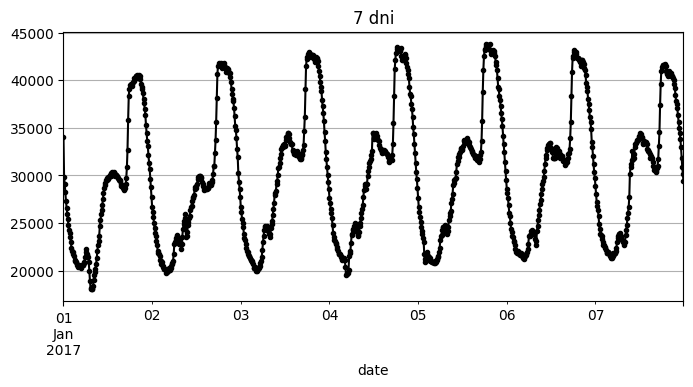

In [83]:
y1["2017-01-01":"2017-01-07"].plot(grid=True, marker=".", figsize=(8, 3.5), color='black')
plt.title("7 dni")
plt.show()

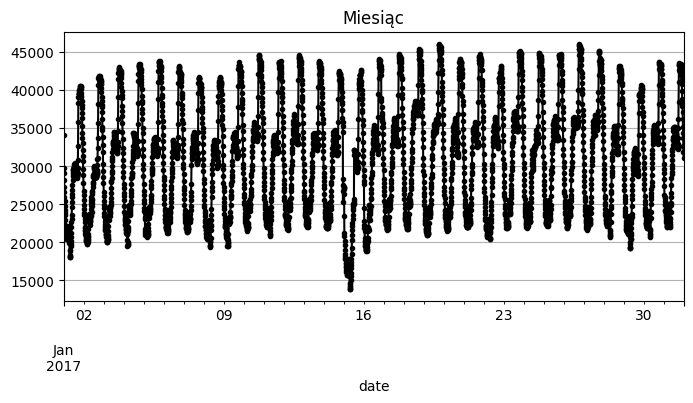

In [84]:
y1["2017-01":"2017-01"].plot(grid=True, marker=".", figsize=(8, 3.5), color='black')
plt.title("Miesiąc")
plt.show()

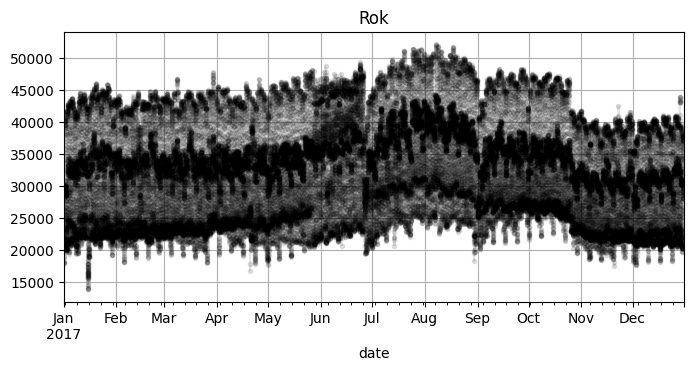

In [85]:
y1["2017-01":"2017-12"].plot(grid=True, marker=".", figsize=(8, 3.5), color='black', alpha=0.1)
plt.title("Rok")
plt.show()

No, widać od razu sezonowość w ciągu dnia, czyli co dzień powtarzają się wartości. Sprawdźmy teraz na wszelki wypadek strefy 2. oraz 3., by nie było później żadnych niespodzianek:

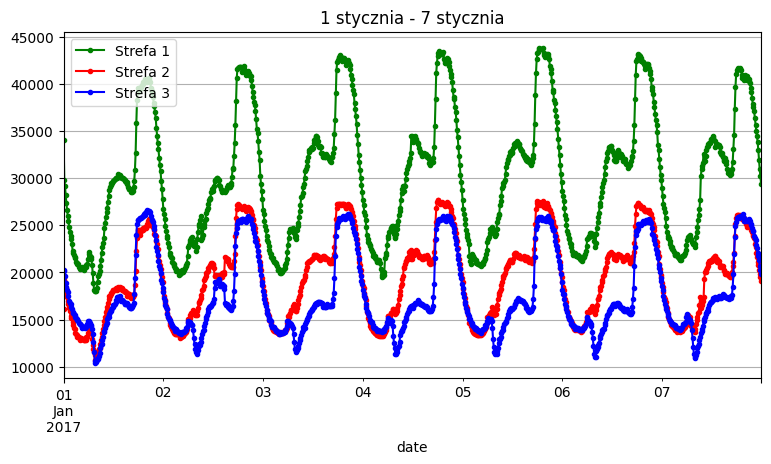

In [86]:
y1["2017-01-01":"2017-01-07"].plot(grid=True, marker=".", figsize=(9, 4.5), color='green', label='Strefa 1')
y2["2017-01-01":"2017-01-07"].plot(grid=True, marker=".", figsize=(9, 4.5), color='red', label='Strefa 2')
y3["2017-01-01":"2017-01-07"].plot(grid=True, marker=".", figsize=(9, 4.5), color='blue', label='Strefa 3')
plt.legend()
plt.title("1 stycznia - 7 stycznia")
plt.show()

Dobra, to teraz widać czym się różnią te strefy. Pierwsza jest najbardziej zachłanna, druga tak już znacznie mniej, no i trzecia strefa ma malutkie wartości...

Skoro trend jest tak wyraźny (zresztą to jest dosyć typowy obraz dla problemu analizy danych czeregów czasowych), to możemy uznać **prognozowanie naiwne** (zwyczajne kopiowanie przeszłej wartości z popredniego dnia w celu prognozowania kolejnego) za świetny **punkt odniesienia**.

Aby zwizualizować te prognozy naiwne, nałóżmy na siebie szereg czasowy przykładowo dla strefy 1. w okresie pierwszych 10 dni stycznia i te same szeregi czasowe opóźnione o jeden dzień (tj. przesunięte w prawo) za pomocą linii przerywanych. Stworzymy także wykres różnicy między obydwoma szeregami czasowymi (tj. wartość w czasie t minus wartość w czasie t+1); jest to tak zwane **różnicowanie** (ang. *differencing*):

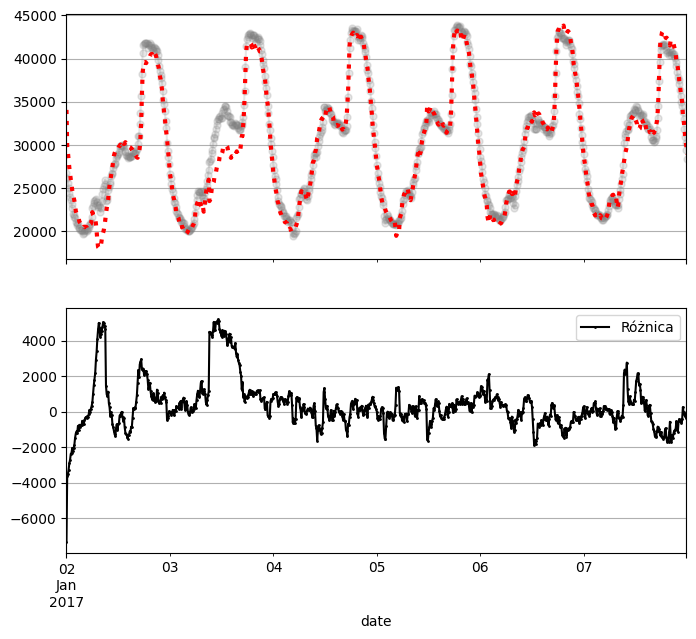

In [87]:
# Różnicowanie
diff_1 = y1.diff(1 * 6 * 24)["2017-01-02":"2017-01-7"]
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 7))

# Pierwotny szereg czasowy
y1["2017-01-02":"2017-01-8"].plot(ax=axs[0], legend=False, marker=".", ms=10, color='grey', alpha=0.2)
# Opóźniony o 1 dzień
y1["2017-01-01":"2017-01-8"].shift(1 * 6 * 24).plot(ax=axs[0], grid=True, legend=False, linestyle=":", lw=3, color="red")
# Szereg czasowy o jednodniowej różnicy
diff_1.plot(ax=axs[1], grid=True, marker=".", ms=2, color='black', label='Różnica')
plt.legend()

plt.show()

Widać, że różnica oscyluje w okolicach **2,000-4,000**... nie wiadomo jakichś tam jednostek wskazujących poziom Power Consumption.

Jest to całkiem niezły wynik, gdyż dla 1. strefy mieliśmy wartość średnią **32,345** oraz odchylenie standardowe **7,130**.

### Teraz powinniśmy skonwertować nasze dane do postaci macierzy numpy, by móc później używać tych danych łatwo do modelu:

In [88]:
X_float = X.to_numpy()
y1_float = y1.to_numpy()
y2_float = y2.to_numpy()
y3_float = y3.to_numpy()

X_float.shape

(52416, 5)

## Podział na zbiory treningowy, walidacyjny i testowy

In [64]:
from sklearn.model_selection import train_test_split

# Pierwszy obszar
X_train, X_test, y1_train, y1_test = train_test_split(X_float, y1_float, test_size=0.3, shuffle=False)
X_val, X_test, y1_val, y1_test = train_test_split(X_test, y1_test, test_size=0.5, shuffle=False)
print(X_train.shape, y1_train.shape)
print(X_val.shape, y1_val.shape)
print(X_test.shape, y1_test.shape, '\n')

# Drugi obszar
X_train, X_test, y2_train, y2_test = train_test_split(X_float, y2_float, test_size=0.3, shuffle=False)
X_val, X_test, y2_val, y2_test = train_test_split(X_test, y2_test, test_size=0.5, shuffle=False)
print(X_train.shape, y2_train.shape)
print(X_val.shape, y2_val.shape)
print(X_test.shape, y2_test.shape, '\n')

# Trzeci obszar
X_train, X_test, y3_train, y3_test = train_test_split(X_float, y3_float, test_size=0.3, shuffle=False)
X_val, X_test, y3_val, y3_test = train_test_split(X_test, y3_test, test_size=0.5, shuffle=False)
print(X_train.shape, y3_train.shape)
print(X_val.shape, y3_val.shape)
print(X_test.shape, y3_test.shape)

(36691, 5) (36691,)
(7862, 5) (7862,)
(7863, 5) (7863,) 

(36691, 5) (36691,)
(7862, 5) (7862,)
(7863, 5) (7863,) 

(36691, 5) (36691,)
(7862, 5) (7862,)
(7863, 5) (7863,)


In [65]:
# Lista dat (przyda się do mapowania później)
dates = X.index
dates[0:5]

AttributeError: 'numpy.ndarray' object has no attribute 'index'

## Model ARIMA

Zacznijmy od stworzenia modelu ARIMA dla 1. strefy. Wartości parametrów modelu ARIMA (p, d, q) będziemy dobierać na podstawie analizy ACF i PACF.
p - liczba opóźnień autoregresji
d - stopień różnicowania
q - liczba opóźnień średniej ruchomej

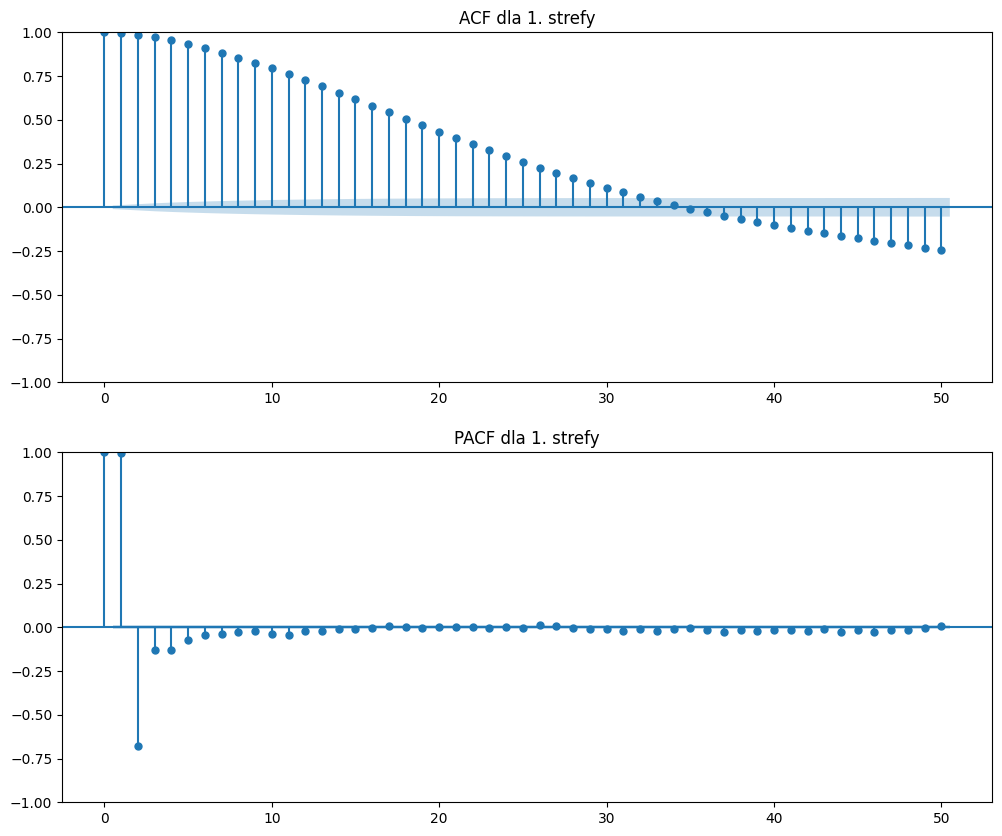

In [66]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# ACF i PACF dla 1. strefy
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

plot_acf(y1_train, ax=axs[0], lags=50, title="ACF dla 1. strefy")

plot_pacf(y1_train, ax=axs[1], lags=50, title="PACF dla 1. strefy")

plt.show()


Widać, że ACF dla paru pierwszych opóźnień jest znaczący, czyli zużycie energii w sporym stopniu zależy od zużycia energii w dniach poprzednich.
Natomiast ACF dla 1. strefy maleje do zera, co sugeruje, że nie ma sezonowości. PACF dla 1. strefy jest znaczący tylko dla pierwszego opóźnienia

In [60]:
## Automatyczne dobieranie parametrów modelu ARIMA
from pmdarima import auto_arima

# Dobieranie parametrów modelu ARIMA
model = auto_arima(y1_train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=1,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=False)

                   
print(model.summary())

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=580053.304, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=565322.915, Time=4.47 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=561317.986, Time=6.81 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=559422.734, Time=11.52 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=557246.679, Time=1.51 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=556526.837, Time=3.01 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=556173.850, Time=3.97 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=556175.823, Time=6.14 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=556754.168, Time=2.18 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=inf, Time=16.36 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=556175.853, Time=4.27 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=556177.445, Time=5.83 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=556278.777, Time=2.41 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=556175.158, Time=11.86 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=556176.660

[    0.         55317.28646591 48259.00577197 ... 23350.81424268
 24166.85858575 24691.1709662 ]


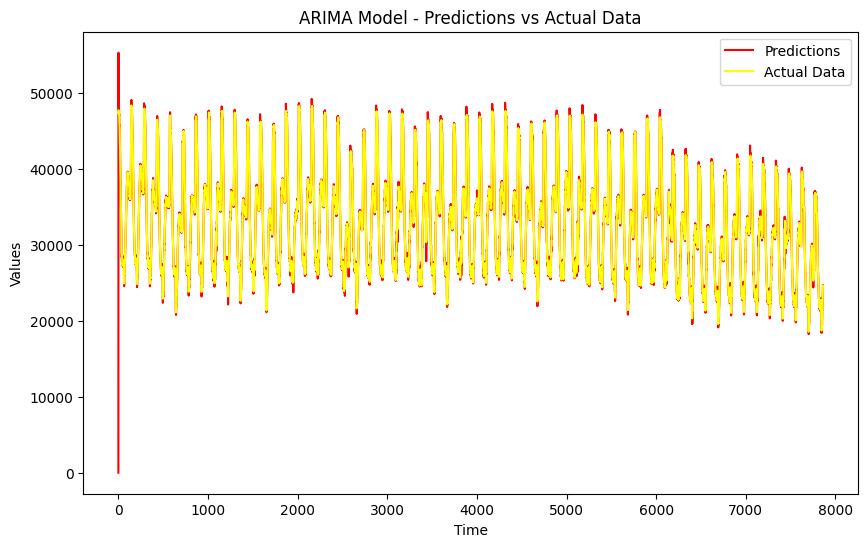

Mean Squared Error (MSE) dla pierwszego targetu: 460516.6389650382
Mean Absolute Error (MAE) dla pierwszego targetu: 278.4204843291477
Mean Absolute Percentage Error (MAPE) dla pierwszego targetu: 0.8554354591632625


In [67]:
from statsmodels.tsa.arima.model import ARIMA

# Wczytanie najlepszego modelu ARIMA
best_order = (1, 1, 2)  # zgodnie z wynikami
best_model = ARIMA(y1_val, order=best_order)

# Dopasowanie modelu do danych walidacyjnych
best_model_fit = best_model.fit()

# Przewidywanie na danych walidacyjnych
predictions = best_model_fit.predict()

# Wyświetlenie predykcji
print(predictions)

# Narysowanie wykresu
plt.figure(figsize=(10, 6))
plt.plot(predictions, color='red', label='Predictions')
plt.plot(y1_val, label='Actual Data', color='yellow')

plt.title('ARIMA Model - Predictions vs Actual Data')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()


from sklearn.metrics import mean_squared_error, mean_absolute_error

# Obliczenie MSE dla pierwszego targetu
mse_y1 = mean_squared_error(y1_val, predictions)
print("Mean Squared Error (MSE) dla pierwszego targetu:", mse_y1)

# Obliczenie MAE dla pierwszego targetu
mae_y1 = mean_absolute_error(y1_val, predictions)
print("Mean Absolute Error (MAE) dla pierwszego targetu:", mae_y1)

# Obliczenie MAP dla pierwszego targetu
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

map_y1 = mean_absolute_percentage_error(y1_val, predictions)
print("Mean Absolute Percentage Error (MAPE) dla pierwszego targetu:", map_y1)


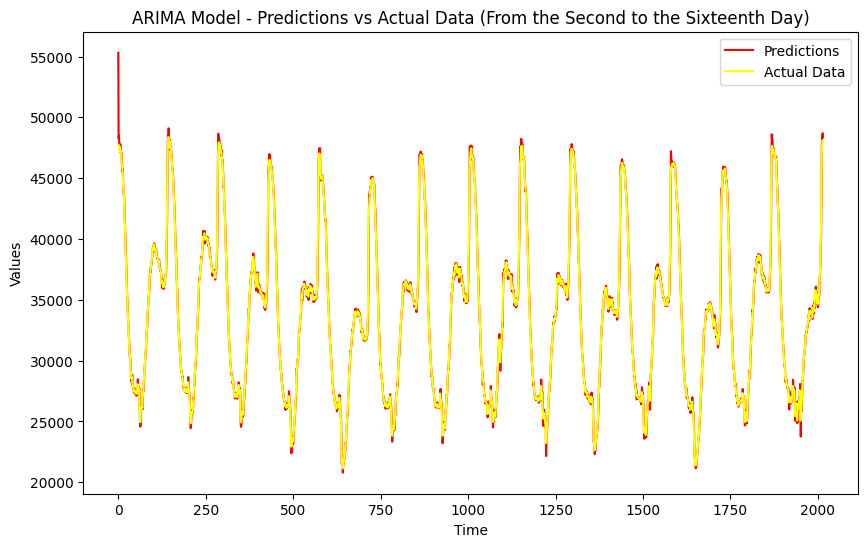

In [68]:
# Narysowanie wykresu tylko dla pierwszych 14 dni
plt.figure(figsize=(10, 6))
plt.plot(predictions[1: 24*6 * 14], color='red', label='Predictions')  
plt.plot(y1_val[1: 24*6 * 14], label='Actual Data', color='yellow') 

plt.title('ARIMA Model - Predictions vs Actual Data (From the Second to the Sixteenth Day)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()



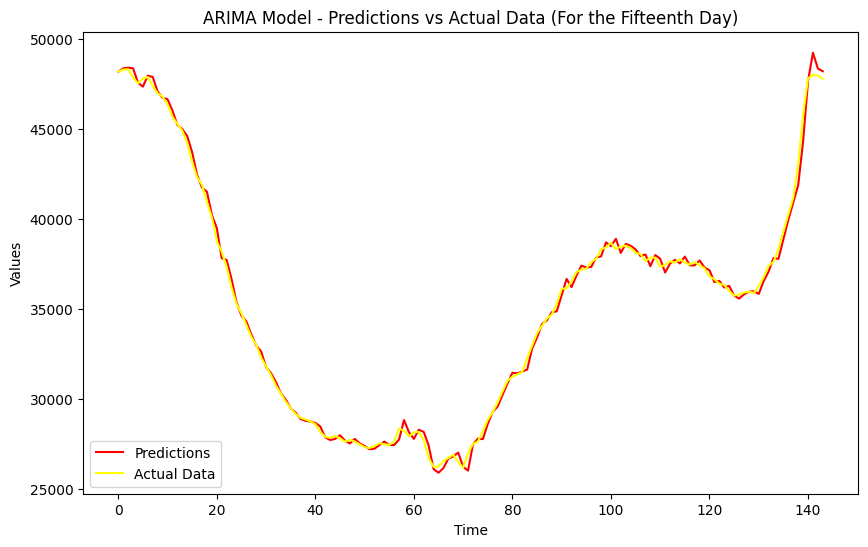

In [69]:
# Narysowanie wykresu tylko dla 15 dnia
plt.figure(figsize=(10, 6))
plt.plot(predictions[24*6 * 14: 24*6 * 15], color='red', label='Predictions')
plt.plot(y1_val[24*6 * 14: 24*6 * 15], label='Actual Data', color='yellow')

plt.title('ARIMA Model - Predictions vs Actual Data (For the Fifteenth Day)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()
